# Overview of the Projects

The school district summary will be a high-level snapshot of the district's key metrics:

- Total number of students
- Total number of schools
- Total budget
- Average math score
- Average reading score
- Percentage of students who passed math
- Percentage of students who passed reading
- Overall passing percentage

In [3]:
# Add the Pandas dependency
import pandas as pd

In [4]:
# Files to load
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/clean_students_complete.csv"

# Read the school data file and store it in a Pandas DataFrame.
school_data_df = pd.read_csv(school_data_to_load)
school_data_df

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500
5,5,Wilson High School,Charter,2283,1319574
6,6,Cabrera High School,Charter,1858,1081356
7,7,Bailey High School,District,4976,3124928
8,8,Holden High School,Charter,427,248087
9,9,Pena High School,Charter,962,585858


In [5]:
# Read the student data file and store it in a Pandas DataFrame.
student_data_df = pd.read_csv(student_data_to_load)
student_data_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


# Merging the DataFrames

In [6]:
# Combine the data into a single dataset.
school_data_complete_df = pd.merge(student_data_df, school_data_df, on=["school_name", "school_name"])
school_data_complete_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


1. We create a new DataFrame for the merged DataFrames, called **school_data_complete_df**.
2. The new DataFrame is created as a result of merging DataFrame #2 (**school_data_df**), which is the "right" DataFrame, into DataFrame #1 (**student_data_df**), which is the "left" DataFrame. We refer to the DataFrames as "left" and "right" to reflect the order they appear inside the parentheses.
3. We use the parameter "on," which is equal to a list of the columns that are identical from each DataFrame, in this case, "school_name." We can also use the column name like this: **on="school_name"**.

# Get the Number of Students

In [7]:
# Get the total number of students.
student_count = school_data_complete_df["Student ID"].count()
print(f"Number of students: {student_count}")

Number of students: 39170


# Get the Number of Schools

In [8]:
# Calculate the total number of schools
schools = school_data_complete_df["school_name"].unique()
schools

array(['Huang High School', 'Figueroa High School', 'Shelton High School',
       'Hernandez High School', 'Griffin High School',
       'Wilson High School', 'Cabrera High School', 'Bailey High School',
       'Holden High School', 'Pena High School', 'Wright High School',
       'Rodriguez High School', 'Johnson High School', 'Ford High School',
       'Thomas High School'], dtype=object)

In [9]:
school_count = len(school_data_complete_df["school_name"].unique())
print(f"The number of schools is: {school_count}")

The number of schools is: 15


# Get the Total Budget

In [10]:
# Calculate the total budget.
total_budget = school_data_df["budget"].sum()
print(f"The total budget is: ${total_budget:,}")

The total budget is: $24,649,428


# Get the Score Averages

In [11]:
# Calculate the average reading score.
average_reading_score = school_data_complete_df["reading_score"].mean()
print(f"Average Reading Score: {average_reading_score:.2f}")

Average Reading Score: 81.88


In [12]:
# Calculate the average math score.
average_math_score = school_data_complete_df["math_score"].mean()
print(f"Average Reading Score: {average_math_score:.2f}")

Average Reading Score: 78.99


# Get the Passing Percentages

To get the percentage of students who passed math and reading, we will write code to:
1. Determine the passing grade.
2. Get the number of students who passed math and reading in separate DataFrames.
3. Calculate the number of students who passed math and reading.
4. Calculate the percentage of students who passed math and reading.

To get the overall passing percentage, we will write code to:
1. Get the number of students who passed both math and reading in a DataFrame.
2. Calculate the number of students who passed both math and reading.
3. Calculate the percentage of students who passed both math and reading.

In [13]:
passing_math = school_data_complete_df["math_score"] >= 70
passing_reading = school_data_complete_df["reading_score"] >= 70

In [14]:
passing_math

0         True
1        False
2        False
3        False
4         True
         ...  
39165     True
39166     True
39167     True
39168     True
39169     True
Name: math_score, Length: 39170, dtype: bool

In [15]:
passing_math["student_name"].count()

KeyError: 'student_name'

## Get the Number of Students Who Passed Math and Reading

In [16]:
# Get all the students who are passing math in a new DataFrame.
passing_math = school_data_complete_df[school_data_complete_df["math_score"] >= 70]
passing_math.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635


In [17]:
# Get all the students that are passing reading in a new DataFrame.
passing_reading = school_data_complete_df[school_data_complete_df["reading_score"] >= 70]
passing_reading.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635


In [18]:
# Calculate the number of students passing math.
passing_math_count = passing_math["student_name"].count()
print(f"Students passing Math: {passing_math_count:,}")

# Calculate the number of students passing reading.
passing_reading_count = passing_reading["student_name"].count()
print(f"Students passing Reading: {passing_reading_count:,}")

Students passing Math: 29,370
Students passing Reading: 33,610


## Get the Percentage of Students Who Passed Math and Reading

In [19]:
# Calculate the percent that passed math.
passing_math_percentage = passing_math_count / float(student_count) * 100
print(f"Approved Math Percentage: {passing_math_percentage:.2f}%")

# Calculate the percent that passed reading.
passing_reading_percentage = passing_reading_count / float(student_count) * 100
print(f"Approved Reading Percentage: {passing_reading_percentage:.2f}%")

Approved Math Percentage: 74.98%
Approved Reading Percentage: 85.81%


## Calculate the Overall Passing Percentage

In [20]:
# Calculate the students who passed both math and reading.
passing_math_reading = school_data_complete_df[(school_data_complete_df["math_score"] >= 70) & (school_data_complete_df["reading_score"] >= 70)]

passing_math_reading.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635
9,9,Matthew Greene,M,10th,Huang High School,96,84,0,District,2917,1910635


In [21]:
# Calculate the number of students who passed both math and reading.
overall_passing_math_reading_count = passing_math_reading["student_name"].count()
print(f"Students who passed math and reading: {overall_passing_math_reading_count:,}")

Students who passed math and reading: 25,528


In [22]:
# Calculate the overall passing percentage.
overall_passing_percentage = overall_passing_math_reading_count / student_count * 100
print(f"Overall passing percentage: {overall_passing_percentage:.2f}%")

Overall passing percentage: 65.17%


# Create a District Summary DataFrame

Now that we have performed all the calculations needed for the district summary, let's add the following values and columns to a new DataFrame named **district_summary_df**.
- Total number of schools in the column "Total Schools"
- Total number of students in the column "Total Students"
- Total budget in the column "Total Budget"
- Average reading score in the column "Average Reading Score"
- Average math score in the column "Average Math Score"
- Percentage of students passing reading in the column "% Passing Reading"
- Percentage of students passing math in the column "% Passing Math"
- Overall passing percentage in the column "% Overall Passing"

In [23]:
# Adding a list of values with keys to create a new DataFrame.
district_summary_df = pd.DataFrame(
          [{"Total Schools": school_count,
          "Total Students": student_count,
          "Total Budget": total_budget,
          "Average Math Score": average_math_score,
          "Average Reading Score": average_reading_score,
          "% Passing Math": passing_math_percentage,
         "% Passing Reading": passing_reading_percentage,
        "% Overall Passing": overall_passing_percentage}]
        )
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,65.172326


# Format Columns

This type of formatting can be done with the built-in Pandas **map()** function. The **map()** function is used for substituting each value in a Series with another value. Where the new value is generated from a function, a dictionary, or a Series.

In [24]:
# Define a function that calculates the percentage of students that passed both 
# math and reading and returns the passing percentage when the function is called.

def passing_math_percent(pass_math_count, student_count):
    return pass_math_count / float(student_count) * 100

In [25]:
passing_math_count = 29370
total_student_count = 39170

In [26]:
# Call the function.
passing_math_percent(passing_math_count, total_student_count)

74.9808526933878

In [27]:
# Format the "Total Students" to have the comma for a thousands separator.
district_summary_df["Total Students"] = district_summary_df["Total Students"].map("{:,}".format)

district_summary_df["Total Students"]

0    39,170
Name: Total Students, dtype: object

In [28]:
# Format "Total Budget" to have the comma for a thousands separator, a decimal separator, and a "$".

district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2f}".format)

district_summary_df["Total Budget"]

0    $24,649,428.00
Name: Total Budget, dtype: object

In [29]:
# Format the columns.
district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].map("{:.1f}".format)

district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].map("{:.1f}".format)

district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].map("{:.0f}".format)

district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].map("{:.0f}".format)

district_summary_df["% Overall Passing"] = district_summary_df["% Overall Passing"].map("{:.0f}".format)

In [30]:
# Display the DataFrame
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",79.0,81.9,75,86,65


# Reorder Columns

In [31]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["Total Schools", "Total Students", "Total Budget","Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading", "% Overall Passing"]

# Assign district summary df the new column order.
district_summary_df = district_summary_df[new_column_order]
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",79.0,81.9,75,86,65


# Set the Index to the School Name

In [32]:
# Determine the school type.
per_school_types = school_data_df.set_index(["school_name"])["type"]
per_school_types

school_name
Huang High School        District
Figueroa High School     District
Shelton High School       Charter
Hernandez High School    District
Griffin High School       Charter
Wilson High School        Charter
Cabrera High School       Charter
Bailey High School       District
Holden High School        Charter
Pena High School          Charter
Wright High School        Charter
Rodriguez High School    District
Johnson High School      District
Ford High School         District
Thomas High School        Charter
Name: type, dtype: object

In [33]:
# Add the per_school_types into a DataFrame for testing.
df = pd.DataFrame(per_school_types)
df

,type
school_name,
Huang High School,District
Figueroa High School,District
Shelton High School,Charter
Hernandez High School,District
Griffin High School,Charter
Wilson High School,Charter
Cabrera High School,Charter
Bailey High School,District
Holden High School,Charter


# Get the Student Count per School

In [34]:
# Calculate the total student count.
per_school_counts = school_data_complete_df["school_name"].value_counts()
per_school_counts

Bailey High School       4976
Johnson High School      4761
Hernandez High School    4635
Rodriguez High School    3999
Figueroa High School     2949
Huang High School        2917
Ford High School         2739
Wilson High School       2283
Cabrera High School      1858
Wright High School       1800
Shelton High School      1761
Thomas High School       1635
Griffin High School      1468
Pena High School          962
Holden High School        427
Name: school_name, dtype: int64

# Get the Budget per Student

In [35]:
# Calculate the total school budget.
per_school_budget = school_data_df.set_index(["school_name"])["budget"]
per_school_budget

school_name
Huang High School        1910635
Figueroa High School     1884411
Shelton High School      1056600
Hernandez High School    3022020
Griffin High School       917500
Wilson High School       1319574
Cabrera High School      1081356
Bailey High School       3124928
Holden High School        248087
Pena High School          585858
Wright High School       1049400
Rodriguez High School    2547363
Johnson High School      3094650
Ford High School         1763916
Thomas High School       1043130
Name: budget, dtype: int64

In [36]:
# Calculate the per capita spending.
per_school_capita = per_school_budget / per_school_counts
per_school_capita

Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0
Wright High School       583.0
dtype: float64

# Get the Score Averages per School

In [37]:
# Calculate the average math scores.
per_school_averages = school_data_complete_df.groupby(["school_name"]).mean()
per_school_averages

,Student ID,reading_score,math_score,School ID,size,budget
school_name,,,,,,
Bailey High School,20358.5,81.033963,77.048432,7.0,4976.0,3124928.0
Cabrera High School,16941.5,83.975780,83.061895,6.0,1858.0,1081356.0
Figueroa High School,4391.0,81.158020,76.711767,1.0,2949.0,1884411.0
Ford High School,36165.0,80.746258,77.102592,13.0,2739.0,1763916.0
Griffin High School,12995.5,83.816757,83.351499,4.0,1468.0,917500.0
Hernandez High School,9944.0,80.934412,77.289752,3.0,4635.0,3022020.0
Holden High School,23060.0,83.814988,83.803279,8.0,427.0,248087.0
Huang High School,1458.0,81.182722,76.629414,0.0,2917.0,1910635.0
Johnson High School,32415.0,80.966394,77.072464,12.0,4761.0,3094650.0


In [38]:
# Calculate the average test scores.
per_school_math = school_data_complete_df.groupby(["school_name"]).mean()["math_score"]

per_school_reading = school_data_complete_df.groupby(["school_name"]).mean()["reading_score"]

per_school_math

school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.359455
Thomas High School       83.418349
Wilson High School       83.274201
Wright High School       83.682222
Name: math_score, dtype: float64

# Get the Passing Percentages per School

To get the passing percentages, we need to:
1. Determine what is the passing grade.
2. Get the number of students who passed math and reading.
3. Get the students who passed math and passed reading

## Determine the Passing Grade

In [39]:
# Calculate the passing scores by creating a filtered DataFrame.
per_school_passing_math = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)]

per_school_passing_reading = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)]

In [40]:
per_school_passing_math

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [41]:
# Calculate the number of students passing math and passing reading by school.
per_school_passing_math = per_school_passing_math.groupby(["school_name"]).count()["student_name"]

per_school_passing_reading = per_school_passing_reading.groupby(["school_name"]).count()["student_name"]

In [42]:
per_school_passing_math

school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
Name: student_name, dtype: int64

## Determine the Percentage of Students Passing Math and Reading

In [43]:
# Calculate the percentage of passing math and reading scores per school.
per_school_passing_math = per_school_passing_math / per_school_counts * 100

per_school_passing_reading = per_school_passing_reading / per_school_counts * 100

In [44]:
per_school_passing_math

Bailey High School       66.680064
Cabrera High School      94.133477
Figueroa High School     65.988471
Ford High School         68.309602
Griffin High School      93.392371
Hernandez High School    66.752967
Holden High School       92.505855
Huang High School        65.683922
Johnson High School      66.057551
Pena High School         94.594595
Rodriguez High School    66.366592
Shelton High School      93.867121
Thomas High School       93.272171
Wilson High School       93.867718
Wright High School       93.333333
dtype: float64

## Get the Overall Passing Percentage for All Students for Each School

In [45]:
# Calculate the students who passed both math and reading.
per_passing_math_reading = school_data_complete_df[(school_data_complete_df["math_score"] >= 70) & (school_data_complete_df["reading_score"] >= 70)]

per_passing_math_reading.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635
9,9,Matthew Greene,M,10th,Huang High School,96,84,0,District,2917,1910635


In [46]:
# Calculate the number of students who passed both math and reading.
per_passing_math_reading = per_passing_math_reading.groupby(["school_name"]).count()["student_name"]

In [47]:
per_passing_math_reading.head()

school_name
Bailey High School      2719
Cabrera High School     1697
Figueroa High School    1569
Ford High School        1487
Griffin High School     1330
Name: student_name, dtype: int64

In [48]:
# Calculate the overall passing percentage.
per_overall_passing_percentage = per_passing_math_reading / per_school_counts * 100
per_overall_passing_percentage

Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64

# Create the School Summary DataFrame

Now that we have performed all the calculations needed for the school summary, we can add the following values to a new DataFrame named **per_school_summary_df**. The data and columns of the DataFrame will be:
- Type of school in the "School Type" column
- Total students per school in the "Total Students" column
- Total budget per school in the "Total School Budget" column
- Total budget per student for each school in the "Per Student Budget" column
- Average math score for each school in the "Average Math Score" column
- Average reading score for each school in the "Average Reading Score" column
- Percentage of students passing math for each school in the "% Passing Math" column
- Percentage of students passing reading for each school in the "% Passing Reading" column
- Overall passing percentage for each school in the "% Overall Passing" column

In [49]:
# Adding a list of values with keys to create a new DataFrame.

per_school_summary_df = pd.DataFrame({
             "School Type": per_school_types,
             "Total Students": per_school_counts,
             "Total School Budget": per_school_budget,
             "Per Student Budget": per_school_capita,
             "Average Math Score": per_school_math,
           "Average Reading Score": per_school_reading,
           "% Passing Math": per_school_passing_math,
           "% Passing Reading": per_school_passing_reading,
           "% Overall Passing": per_overall_passing_percentage})
per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455


# Clean Up the DataFrame

In the **per_school_summary_df** DataFrame, we will format the **Total School Budget** and **Per Student Budget** columns to include:
- A U.S. dollar sign 
- Two decimal places
- A thousands separator

## Format Columns

In [50]:
# Format the Total School Budget and the Per Student Budget columns.
per_school_summary_df["Total School Budget"] = per_school_summary_df["Total School Budget"].map("${:,.2f}".format)

per_school_summary_df["Per Student Budget"] = per_school_summary_df["Per Student Budget"].map("${:,.2f}".format)


# Display the data frame
per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455


## Reorder Columns

In [51]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["School Type", "Total Students", "Total School Budget", "Per Student Budget", "Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading", "% Overall Passing"]

# Assign district summary df the new column order.
per_school_summary_df = per_school_summary_df[new_column_order]

per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455


# Find the Highest Performing Schools

To display the top five highest-performing schools, we can sort the **per_school_summary_df** DataFrame on the **% Overall Passing** column.

In [52]:
# Sort and show top five schools.
top_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=False)

top_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


# Find the Lowest Performing Schools

In [53]:
# Sort and show top five schools.
bottom_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=True)

bottom_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


# Create Grade-Level DataFrames

In [55]:
# Create a grade level DataFrames.
ninth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "9th")]

tenth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "10th")]

eleventh_graders = school_data_complete_df[(school_data_complete_df["grade"] == "11th")]

twelfth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "12th")]

In [56]:
ninth_graders

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
12,12,Brittney Walker,F,9th,Huang High School,64,79,0,District,2917,1910635
13,13,William Long,M,9th,Huang High School,71,79,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39152,39152,Lori Moore,F,9th,Thomas High School,98,84,14,Charter,1635,1043130
39153,39153,William Hubbard,M,9th,Thomas High School,80,75,14,Charter,1635,1043130
39157,39157,Kristen Gonzalez,F,9th,Thomas High School,79,94,14,Charter,1635,1043130
39164,39164,Joseph Anthony,M,9th,Thomas High School,97,76,14,Charter,1635,1043130


# Score Averages Grouped by School Name

## Get the Average Math Scores by School

In [62]:
# Group each grade level DataFrame by the school name for the average math score.
ninth_grade_math_scores = ninth_graders.groupby(["school_name"]).mean()["math_score"]

tenth_grade_math_scores = tenth_graders.groupby(["school_name"]).mean()["math_score"]

eleventh_grade_math_scores = eleventh_graders.groupby(["school_name"]).mean()["math_score"]

twelfth_grade_math_scores = twelfth_graders.groupby(["school_name"]).mean()["math_score"]

In [63]:
eleventh_grade_math_scores

school_name
Bailey High School       77.515588
Cabrera High School      82.765560
Figueroa High School     76.884344
Ford High School         76.918058
Griffin High School      83.842105
Hernandez High School    77.136029
Holden High School       85.000000
Huang High School        76.446602
Johnson High School      77.491653
Pena High School         84.328125
Rodriguez High School    76.395626
Shelton High School      83.383495
Thomas High School       83.498795
Wilson High School       83.195326
Wright High School       83.836782
Name: math_score, dtype: float64

In [64]:
# Group each grade level DataFrame by the school name for the average reading score.
ninth_grade_reading_scores = ninth_graders.groupby(["school_name"]).mean()["reading_score"]

tenth_grade_reading_scores = tenth_graders.groupby(["school_name"]).mean()["reading_score"]

eleventh_grade_reading_scores = eleventh_graders.groupby(["school_name"]).mean()["reading_score"]

twelfth_grade_reading_scores = twelfth_graders.groupby(["school_name"]).mean()["reading_score"]

In [67]:
twelfth_grade_reading_scores

school_name
Bailey High School       80.912451
Cabrera High School      84.287958
Figueroa High School     81.384863
Ford High School         80.662338
Griffin High School      84.013699
Hernandez High School    80.857143
Holden High School       84.698795
Huang High School        80.305983
Johnson High School      81.227564
Pena High School         84.591160
Rodriguez High School    80.376426
Shelton High School      82.781671
Thomas High School       83.831361
Wilson High School       84.317673
Wright High School       84.073171
Name: reading_score, dtype: float64

# Combine each grade level Series into a DataFrame

In [68]:
# Combine each grade level Series for average math scores by school into a single DataFrame.
math_scores_by_grade = pd.DataFrame({
               "9th": ninth_grade_math_scores,
               "10th": tenth_grade_math_scores,
               "11th": eleventh_grade_math_scores,
               "12th": twelfth_grade_math_scores})

math_scores_by_grade.head()

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164


In [69]:
# Combine each grade level Series for average reading scores by school into a single DataFrame.
reading_scores_by_grade = pd.DataFrame({
              "9th": ninth_grade_reading_scores,
              "10th": tenth_grade_reading_scores,
              "11th": eleventh_grade_reading_scores,
              "12th": twelfth_grade_reading_scores})

reading_scores_by_grade.head()

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699


# Format the Averages and Remove the Index Name

In [70]:
  # Format each grade column.
  math_scores_by_grade["9th"] = math_scores_by_grade["9th"].map("{:.1f}".format)

  math_scores_by_grade["10th"] = math_scores_by_grade["10th"].map("{:.1f}".format)

  math_scores_by_grade["11th"] = math_scores_by_grade["11th"].map("{:.1f}".format)

  math_scores_by_grade["12th"] = math_scores_by_grade["12th"].map("{:.1f}".format)

  # Make sure the columns are in the correct order.
  math_scores_by_grade = math_scores_by_grade[
                 ["9th", "10th", "11th", "12th"]]

  # Remove the index name.
  math_scores_by_grade.index.name = None
  # Display the DataFrame.
  math_scores_by_grade.head()

,9th,10th,11th,12th
Bailey High School,77.1,77.0,77.5,76.5
Cabrera High School,83.1,83.2,82.8,83.3
Figueroa High School,76.4,76.5,76.9,77.2
Ford High School,77.4,77.7,76.9,76.2
Griffin High School,82.0,84.2,83.8,83.4


In [71]:
  # Format each grade column.
  reading_scores_by_grade["9th"] = reading_scores_by_grade["9th"].map("{:,.1f}".format)

  reading_scores_by_grade["10th"] = reading_scores_by_grade["10th"].map("{:,.1f}".format)

  reading_scores_by_grade["11th"] = reading_scores_by_grade["11th"].map("{:,.1f}".format)

  reading_scores_by_grade["12th"] = reading_scores_by_grade["12th"].map("{:,.1f}".format)

  # Make sure the columns are in the correct order.
  reading_scores_by_grade = reading_scores_by_grade[
                 ["9th", "10th", "11th", "12th"]]

  # Remove the index name.
  reading_scores_by_grade.index.name = None
  # Display the data frame.
  reading_scores_by_grade.head()

,9th,10th,11th,12th
Bailey High School,81.3,80.9,80.9,80.9
Cabrera High School,83.7,84.3,83.8,84.3
Figueroa High School,81.2,81.4,80.6,81.4
Ford High School,80.6,81.3,80.4,80.7
Griffin High School,83.4,83.7,84.3,84.0


# Establish the Spending Ranges per Student

To create this DataFrame, we need to do the following:
1. Group the schools into four bins, or ranges, based on the budget per student.
2. For each spending range, get the following data:
- Average math and reading scores
- The percentage of students passing math and reading
- The overall passing percentage, which is the average of the percentage of students passing math and reading

## Get the Spending Ranges

Before we create the bins, we need to determine the distribution of spending per student. We can find the distribution for school spending per student by using the **describe()** method.

In [72]:
# Get the descriptive statistics for the per_school_capita.
per_school_capita.describe()

count     15.000000
mean     620.066667
std       28.544368
min      578.000000
25%      591.500000
50%      628.000000
75%      641.500000
max      655.000000
dtype: float64

As you can see, the minimum is 578 and the maximum is 655. The standard deviation is 28.5, or approximately 30. We don't want the lowest bin to be 578 because there is only one school at or below 578, which is Wilson High School. However, there are four schools that spend less than $ 585 per student, so 585 will be our lowest bin. Also, because the standard deviation is about 30, we will increase the bins by 30, up to 675. Therefore, the four bins will be: 585, 615, 645, and 675.

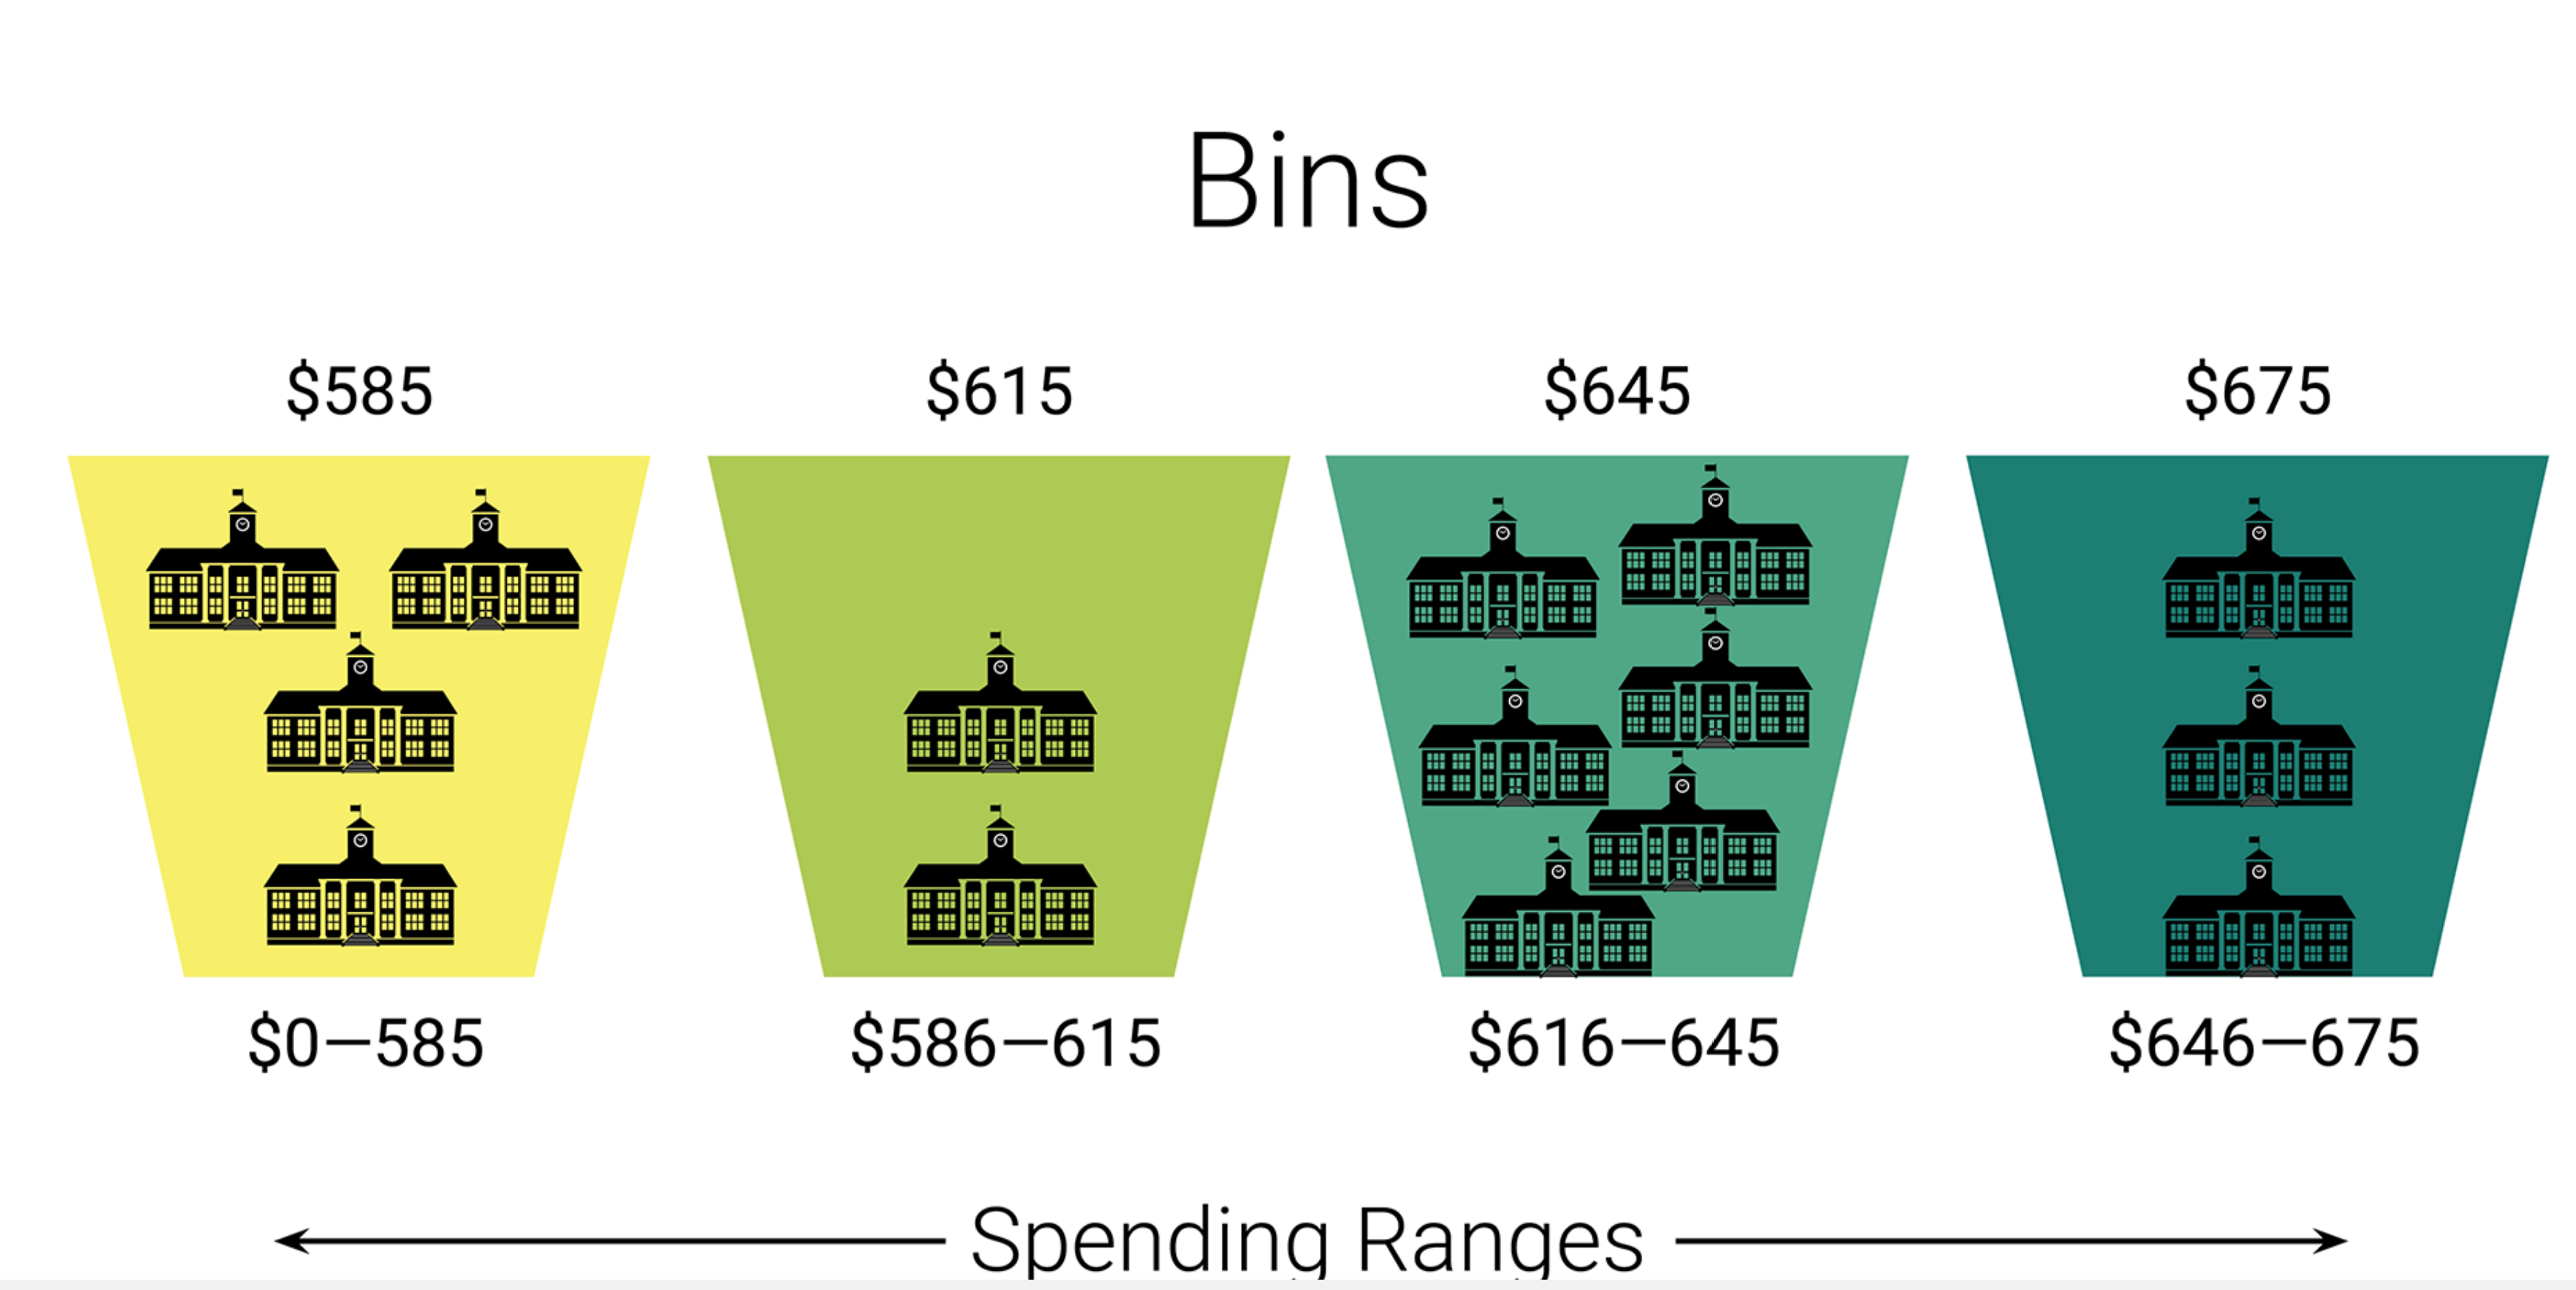

To group the spending ranges, we use the Pandas **cut()** function. The **cut()** function segments and sorts data values into bins. We'll use the **cut()** function to create our spending bins.

To apply the **cut()** function to a DataFrame or Series, we use **pd.cut(df, ranges)**. This creates a new DataFrame or Series on the given ranges.

In [74]:
# Cut the per_school_capita into the spending ranges.
# spending_bins = [0, 585, 615, 645, 675]
# per_school_capita.groupby(pd.cut(per_school_capita, spending_bins)).count()

(0, 585]      4
(585, 615]    2
(615, 645]    6
(645, 675]    3
dtype: int64

Looking at this output, it seems that we didn't group the schools fairly. We need to adjust our ranges so that we have three or four schools in each range. Let's increase the **[585, 615]** range to **[585, 630]** and change the third range to **[630, 645]**. The **spending_bins** will look like this: 

**[0, 585, 630, 645, 675]**

In [76]:
# Cut the per_school_capita into the spending ranges.
spending_bins = [0, 585, 630, 645, 675]
per_school_capita.groupby(pd.cut(per_school_capita, spending_bins)).count()

(0, 585]      4
(585, 630]    4
(630, 645]    4
(645, 675]    3
dtype: int64

In [77]:
# Establish the spending bins and group names.
spending_bins = [0, 585, 630, 645, 675]
group_names = ["<$586", "$586-630", "$631-645", "$646-675"]

# Categorize the Spending Bins

In [78]:
# Categorize spending based on the bins.
per_school_summary_df["Spending Ranges (Per Student)"] = pd.cut(per_school_capita, spending_bins, labels=group_names)

per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$586-630
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$586
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$631-645
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$631-645
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$586-630
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$646-675
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$586
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$646-675
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$646-675
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,$586-630


# Group by the Spending Ranges

In [79]:
# Calculate averages for the desired columns.
spending_math_scores = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]

spending_reading_scores = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]

spending_passing_math = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]

spending_passing_reading = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]

overall_passing_spending = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"]

In [80]:
overall_passing_spending

Spending Ranges (Per Student)
<$586       90.369459
$586-630    81.418596
$631-645    62.857656
$646-675    53.526855
Name: % Overall Passing, dtype: float64

# Create a DataFrame for the Scores by School Spending

In [81]:
# Assemble into DataFrame.
spending_summary_df = pd.DataFrame({
          "Average Math Score" : spending_math_scores,
          "Average Reading Score": spending_reading_scores,
          "% Passing Math": spending_passing_math,
          "% Passing Reading": spending_passing_reading,
          "% Overall Passing": overall_passing_spending})

spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$586,83.455399,83.933814,93.460096,96.610877,90.369459
$586-630,81.899826,83.155286,87.133538,92.718205,81.418596
$631-645,78.518855,81.624473,73.484209,84.391793,62.857656
$646-675,76.997210,81.027843,66.164813,81.133951,53.526855


## Format the DataFrame

In [82]:
# Formatting
spending_summary_df["Average Math Score"] = spending_summary_df["Average Math Score"].map("{:.1f}".format)

spending_summary_df["Average Reading Score"] = spending_summary_df["Average Reading Score"].map("{:.1f}".format)

spending_summary_df["% Passing Math"] = spending_summary_df["% Passing Math"].map("{:.0f}".format)

spending_summary_df["% Passing Reading"] = spending_summary_df["% Passing Reading"].map("{:.0f}".format)

spending_summary_df["% Overall Passing"] = spending_summary_df["% Overall Passing"].map("{:.0f}".format)

spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$586,83.5,83.9,93,97,90
$586-630,81.9,83.2,87,93,81
$631-645,78.5,81.6,73,84,63
$646-675,77.0,81.0,66,81,54
